<a href="https://colab.research.google.com/github/prtk2001/Face-Detection-Algorithm/blob/main/FullFaceDetectionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
https://drive.google.com/file/d/1gQq-6EDHzlQm7yvpKkCLWyo_ySfjuFzf/view?usp=sharing

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow.compat.v1.keras.backend as K
import tensorflow as tf
#tf.compat.v1.disable_eager_execution()
#import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)
#tf.enable_eager_execution()
tf.compat.v1.enable_eager_execution()

import tensorflow_hub as hub
import os
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
#from keras import optimizers

In [2]:
file_id = '1gQq-6EDHzlQm7yvpKkCLWyo_ySfjuFzf'

# Download dataset
!gdown https://drive.google.com/uc?id={file_id}

# Unzip the downloaded file
!unzip -q face-detection.zip

Downloading...
From: https://drive.google.com/uc?id=1gQq-6EDHzlQm7yvpKkCLWyo_ySfjuFzf
To: /content/face-detection.zip
165MB [00:02, 59.4MB/s]


In [3]:
root_dir = './face-detection'

train_dir = os.path.join(root_dir, 'train')
val_dir = os.path.join(root_dir, 'val')

In [4]:
import time
import os
from os.path import exists

def count(dir, counter=0):
    "returns number of files in dir and subdirs"
    for pack in os.walk(dir):
        for f in pack[2]:
            counter += 1
    return dir + " : " + str(counter) + "files"


In [5]:
print('total images for training :', count(train_dir))
print('total images for validation :', count(val_dir))


total images for training : ./face-detection/train : 1459files
total images for validation : ./face-detection/val : 411files


In [6]:
#!!wget https://github.com/obeshor/Plant-Diseases-Detector/archive/master.zip
#!unzip master.zip;
#https://drive.google.com/file/d/1JJ1bZvFrDlgUuslHNaNhyQsH-68cuEnB/view?usp=sharing
file_id = '1JJ1bZvFrDlgUuslHNaNhyQsH-68cuEnB'

# Download dataset
!gdown https://drive.google.com/uc?id={file_id}

# Unzip the downloaded file
#!unzip -q PlantVillage.zipf

Downloading...
From: https://drive.google.com/uc?id=1JJ1bZvFrDlgUuslHNaNhyQsH-68cuEnB
To: /content/categories.json
100% 135/135 [00:00<00:00, 208kB/s]


In [9]:
import json

with open('/content/categories.json', 'r') as f:
    cat_to_name = json.load(f)
    classes = list(cat_to_name.values())
    
print (classes)

['animated', 'clear', 'Id card Images', 'obstruction', 'unprofessional']


In [10]:
print('Number of classes:',len(classes))

Number of classes: 5


In [11]:


IMAGE_SHAPE = (224, 224)

BATCH_SIZE = 64 

In [12]:
# Inputs are suitably resized for the selected module. Dataset augmentation (i.e., random distortions of an image each time it is read) improves training, esp. when fine-tuning.

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    val_dir, 
    shuffle=False, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
    target_size=IMAGE_SHAPE,
    batch_size=BATCH_SIZE)

do_data_augmentation = True #@param {type:"boolean"}
if do_data_augmentation:
  train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      horizontal_flip=True,
      width_shift_range=0.2, 
      height_shift_range=0.2,
      shear_range=0.2, 
      zoom_range=0.2,
      fill_mode='nearest' )
else:
  train_datagen = validation_datagen
  
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    subset="training", 
    shuffle=True, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
    target_size=IMAGE_SHAPE,
    batch_size=BATCH_SIZE)


Found 379 images belonging to 5 classes.
Found 1377 images belonging to 5 classes.


In [44]:

model = tf.keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", 
                 output_shape=[1280],
                 trainable=False),
                 
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])


In [45]:
model.summary()

ValueError: ignored

In [51]:
#Compile model specifying the optimizer learning rate

LEARNING_RATE = 0.001 #@param {type:"number"}

model.compile(
   optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
   loss='categorical_crossentropy',
   metrics=['accuracy'])



In [52]:
EPOCHS=10 

history = model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples//train_generator.batch_size,
        epochs=EPOCHS,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples//validation_generator.batch_size)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
21/21 [==============================] - 65s 3s/step - loss: 0.2617 - accuracy: 0.9391 - val_loss: 0.6773 - val_accuracy: 0.8281
Epoch 2/10
21/21 [==============================] - 62s 3s/step - loss: 0.1115 - accuracy: 0.9650 - val_loss: 0.5587 - val_accuracy: 0.8438
Epoch 3/10
21/21 [==============================] - 62s 3s/step - loss: 0.0876 - accuracy: 0.9657 - val_loss: 0.4332 - val_accuracy: 0.8750
Epoch 4/10
21/21 [==============================] - 61s 3s/step - loss: 0.0946 - accuracy: 0.9604 - val_loss: 0.3668 - val_accuracy: 0.8875
Epoch 5/10
21/21 [==============================] - 61s 3s/step - loss: 0.1067 - accuracy: 0.9566 - val_loss: 0.1879 - val_accuracy: 0.9312
Epoch 6/10
21/21 [==============================] - 62s 3s/step - loss: 0.0800 - accuracy: 0.9673 - val_loss: 0.2971 - val_accuracy: 0.9062
Epoch 7/10
21/21 [==============================] - 63s 3s/step - loss: 0.0852 - accuracy: 0.9688 - val_loss: 0.4317 - val_accuracy: 0.8781
Epoch 8/10
21/21 [==

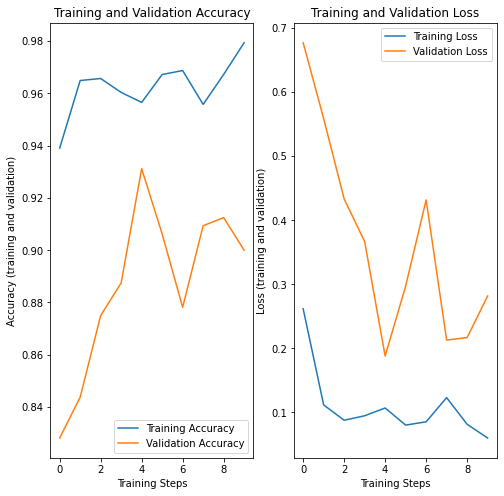

In [53]:
import matplotlib.pylab as plt
import numpy as np

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.show()
model.save('my_model.h5')

In [54]:
# Import OpenCV
import cv2

# Utility
import itertools
import random
from collections import Counter
from glob import iglob


def load_image(filename):
    img = cv2.imread(os.path.join(root_dir, val_dir, filename))
    assert not isinstance(img,type(None)), 'image not found'
    
    img = cv2.resize(img, (IMAGE_SHAPE[0], IMAGE_SHAPE[1]) )
  
    img = img /255
    
    
    return img


def predict(image):
    probabilities = model.predict(np.asarray([img]))[0]
    class_idx = np.argmax(probabilities)
    
    return {classes[class_idx]: probabilities[class_idx]}

Saving download (7).jpg to download (7).jpg
PREDICTED: class: unprofessional, confidence: 0.989347


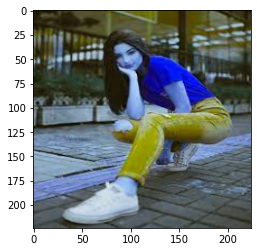

In [55]:
#for idx, filename in enumerate(random.sample(validation_generator.filenames, 5)):
#    print("SOURCE: class: %s, file: %s" % (os.path.split(filename)[0], filename))
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = load_image(path)
  #img = load_image('/content/face-detection/val/obstruction/00595_Mask.jpg')
  prediction = predict(img)
  print("PREDICTED: class: %s, confidence: %f" % (list(prediction.keys())[0], list(prediction.values())[0]))
  plt.imshow(img)
  #plt.figure(idx)    
  plt.show()




Saving IMG-20200709-WA0008.jpg to IMG-20200709-WA0008 (3).jpg


TypeError: ignored